### Partials

In [99]:
def quad(a,b,c,x):
    return a*x**2 + b*x + c

quad(3,2,1,1.5)

10.75

In [100]:
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

In [101]:
f = mk_quad(3,2,1)
f(1.5)

10.75

# 1. Understanding SGD

Prerequisite - use the anaconda3 terminal compiler

In [102]:
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *
import torch

#### 1. Plotting functions and how it works

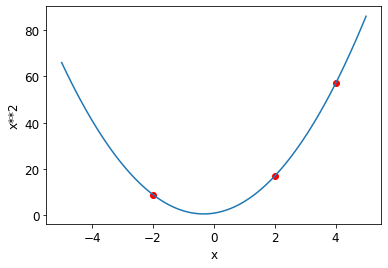

In [103]:
# def f(x): return x**2

plot_function(f, 'x', 'x**2', min=-5, max=5)
plt.scatter(-2.0, f(-2.0), color='red');
plt.scatter(2.0, f(2.0), color='red');
plt.scatter(4.0, f(4.0), color='red'); # scatter (x, y, color)

#### 2. Basic method for how the gradient is computed

In [104]:
def f(x): return (x**2).sum() # Needs the sum if you are taking in multiple inputs if not it will not return 

xt = tensor([-2.,2.,4.]).requires_grad_()
print(f"xt: {xt}")
yt = f(xt)
print(f"yt: {yt}")
yt.backward() #compute the backward prop
# print(f"yt: {yt}")
grad = xt.grad
grad

xt: tensor([-2.,  2.,  4.], requires_grad=True)
yt: 24.0


tensor([-4.,  4.,  8.])

#### 3. Understanding how the mean function is computed

In this example it takes the difference between each xi -> ((v_pred-v_tar)^^2).sum()  / len(v_pred) ->  value/3 -- 2141. Which is the loss value.

In [105]:
def mse(preds, targets): return ((preds-targets)**2).mean()

v_tar = tensor([30.,20.,10.]).requires_grad_()
v_pred = tensor([-30.,-20.,-25.]).requires_grad_()

loss = mse(v_pred, v_tar) 
loss

tensor(2141.6667, grad_fn=<MeanBackward0>)

#### 4. Another approach for computing the SGD

- In this example we try to create a function and introduce some random noise to it 
- Then we try to represent it via a quadratic function

orig params: tensor([ 1.0892, -0.6523, -0.0462], grad_fn=<CloneBackward0>)
target speed: tensor([71.7272, 57.0914, 45.8181, 35.1304, 24.8191, 17.6405, 10.0963,  8.9651,  7.0750, -4.2977,  0.7620,  1.9557,  3.3378,  9.3842, 20.8929, 22.8370, 28.2901, 42.9987, 47.6063, 70.1194])
pred speed: tensor([-4.6246e-02,  3.9068e-01,  3.0060e+00,  7.7998e+00,  1.4772e+01,  2.3923e+01,  3.5252e+01,  4.8759e+01,  6.4445e+01,  8.2310e+01,  1.0235e+02,  1.2457e+02,  1.4897e+02,  1.7555e+02,
         2.0431e+02,  2.3524e+02,  2.6836e+02,  3.0365e+02,  3.4112e+02,  3.8077e+02], grad_fn=<AddBackward0>)


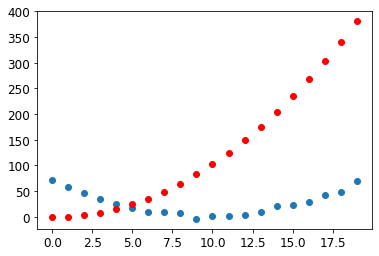

In [106]:
import torch
from fastai.vision.all import *
from fastbook import * #Fast ai supports the plt functionality

time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed);

#Parametric function which we are trying to guess
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets): return ((preds-targets)**2).mean()

params = torch.randn(3).requires_grad_()
orig_params = params.clone()
print(f"orig params: {orig_params}")

preds = f(time, params) #Calculate the preds

print(f"target speed: {speed}")
print(f"pred speed: {preds}")

#Temporary detach the torch so i can print out the pred
pred_copy = preds.detach().numpy()
#Alternate way is to use the to_np library 
# pred_copy = to_np(preds)

plt.scatter(time, pred_copy, color="red") 

In [107]:
#Calculating the loss
loss = mse(preds, speed)
print(f"loss :{loss}")

#Before backward propagation
print(f"params: {params.grad}")

#After computing the backwards propagation - THIS THE PART IM SUPER LOST
loss.backward()
print(f"params: {params.grad}") #It finds the gradient of the parametrs after it computes the loss
#2at + b


loss :24262.6328125
params: None
params: tensor([51488.2500,  3291.8914,   204.3257])


## 4.1 Mapping quadratic wrt parabolic function
This is a more intuitive way to understand sgd

orig params: tensor([1., 1., 1.], grad_fn=<CloneBackward0>)

target out: tensor([1, 4, 9])
pred out: tensor([ 3.,  7., 13.], grad_fn=<AddBackward0>)
loss val: 9.666666984558105

tensor([33.3333, 13.3333,  6.0000])
params gradient data: tensor([33.3333, 13.3333,  6.0000])
orig params: tensor([1., 1., 1.])

Updated params: tensor([0.6667, 0.8667, 0.9400])


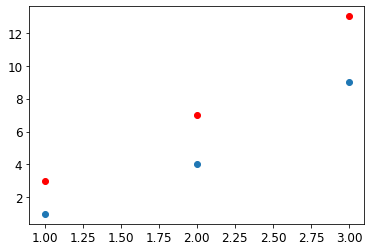

In [108]:
import torch
from fastai.vision.all import *
from fastbook import * #Fast ai supports the plt functionality

time = tensor([1.,2.,3.]) #time
out = tensor([1,4,9]) # Parabolic function output

plt.scatter(time,out)

# #Parametric function which we are trying to guess
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets): return ((preds-targets)**2).mean()

# TODO [READ] By right this should be randomly initialized but I dont initialise it randomly since i want to be able to compute at every step 
# params = torch.randn(3).requires_grad_() # 
params = tensor([1.,1.,1.]).requires_grad_()

orig_params = params.clone()
print(f"orig params: {orig_params}")

preds = f(time, params) #Calculate the preds give the parameters initialized

print(f"\ntarget out: {out}")
print(f"pred out: {preds}")

# #Temporary detach the torch so i can print out the pred
# pred_copy = preds.detach().numpy()
# #Alternate way is to use the to_np library 
pred_copy = to_np(preds)

plt.scatter(time, pred_copy, color="red") 

def mse(preds, targets): return ((preds-targets)**2).mean()

loss = mse(preds,out)
print(f"loss val: {loss}")
loss.backward()

print(f"\n{params.grad}") # Gradient of the parameters
print(f"params gradient data: {params.grad.data}")
print(f"orig params: {params.data}") # Original weights

#Formula -> w -= gradient(w) * lr 
lr = 1e-2
params.data -= lr * params.grad.data
params.grad = None # Zero back the data
print(f"\nUpdated params: {params.data}") # Original weights

#### Second Pass
target = Blue

target out: tensor([1, 4, 9])
pred out: tensor([2.4733, 5.3400, 9.5400], grad_fn=<AddBackward0>)
loss val: 1.4193038940429688
tensor([7.7956, 3.8489, 2.2356])
params gradient data: tensor([7.7956, 3.8489, 2.2356])
 params data: tensor([0.6667, 0.8667, 0.9400])
Params:  tensor([0.5887, 0.8282, 0.9176], requires_grad=True)


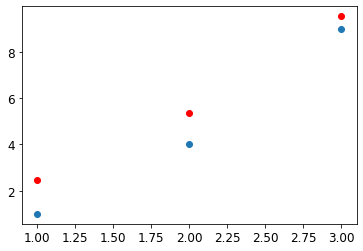

In [109]:
#After the data update
plt.scatter(time,out)
preds = f(time, params) #Calculate the preds

print(f"target out: {out}")
print(f"pred out: {preds}")

# #Temporary detach the torch so i can print out the pred
# pred_copy = preds.detach().numpy()
# #Alternate way is to use the to_np library 
pred_copy = to_np(preds)

plt.scatter(time, pred_copy, color="red") 
loss = mse(preds,out)
print(f"loss val: {loss}")
loss.backward()

print(params.grad) # Gradient of the parameters
print(f"params gradient data: {params.grad.data}")
print(f" params data: {params.data}") # Original weights
#Formula -> w -= gradient(w) * lr 
lr = 1e-2
params.data -= lr * params.grad.data
params.grad = None # Zero back the data
print("Params: ", params)

## Third Pass

target out: tensor([1, 4, 9])
pred out: tensor([2.3345, 4.9288, 8.7006], grad_fn=<AddBackward0>)
loss val: 0.9111284613609314
tensor([1.5701, 1.5293, 1.3093])
params gradient data: tensor([1.5701, 1.5293, 1.3093])
 params data: tensor([0.5887, 0.8282, 0.9176])
 params data: tensor([0.5730, 0.8129, 0.9046])


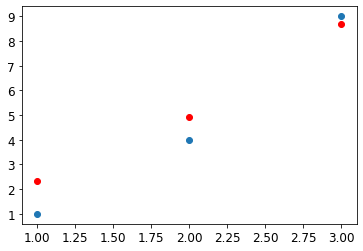

In [110]:
#After the data update
plt.scatter(time,out)
preds = f(time, params) #Calculate the preds

print(f"target out: {out}")
print(f"pred out: {preds}")

# #Temporary detach the torch so i can print out the pred
# pred_copy = preds.detach().numpy()
# #Alternate way is to use the to_np library 
pred_copy = to_np(preds)

plt.scatter(time, pred_copy, color="red") 
loss = mse(preds,out)
print(f"loss val: {loss}")
loss.backward()

print(params.grad) # Gradient of the parameters
print(f"params gradient data: {params.grad.data}")
print(f" params data: {params.data}") # Original weights
#Formula -> w -= gradient(w) * lr 
lr = 1e-2
params.data -= lr * params.grad.data
params.grad = None # Zero back the data
print(f" params data: {params.data}") # Original weights

Converges with various iterations according to the learning rate

#### Converting from rank 3 tensor to rank 2

Difference between rank 3 and rank 2 tensor 

Rank 2 tensor is a matrix 
Rank 3 tensor is a stack of matrix

Rank 2 tensor can be accessed using (i,j)
Rank 3 tensor can be accessed using (i,j,k)

Rank 2 tensors are easier to manipulate since they are standard matrix 
Rank 3 tensors are more complicated to manipulate

In [111]:
import numpy as np

# Create a rank-3 tensor - List of matrix 
tensor_3d = np.array([
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]]
])

# Flattening the tensor
tensor_2d_flattened = tensor_3d.reshape(-1, tensor_3d.shape[-1])
print(f"Rank 3 tensor: \n{tensor_3d}")
print(f"Rank 3 tensor shape: {tensor_3d.shape}")
print(f"\nRank 2 tensor: \n{tensor_2d_flattened}")
print(f"Rank 2 tensor shape: {tensor_2d_flattened.shape}")

# print(tensor_2d_flattened)
# print(tensor_3d.shape)
# print(tensor_2d_flattened.shape)

Rank 3 tensor: 
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Rank 3 tensor shape: (2, 2, 3)

Rank 2 tensor: 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Rank 2 tensor shape: (4, 3)


Understanding how the view function works

In [115]:
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]]) # [2,2,2] shape
print(f"{tensor_3d.shape}")

sec_tensor_3d = torch.tensor([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])
sec_tensor_3d

test_tensor = torch.cat([tensor_3d, sec_tensor_3d]).view(-1, 2*2)
test_tensor



torch.Size([2, 2, 2])


tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

# Question Bank

### Writing a custom Learner class

Data Loader Class
- Consist of flattening the matrix from 28*28 to a 784 repr
- Training set: 6265 threes, 6131 sevens, total: 12396
- Test set:     1010 threes, 1028 sevens, total: 2038

In [ ]:
#dset - Mapping of the flattened 28*28 matrix and their numeric repr 
#e.g for 3/7 ->  x[728]y[1] -> [123,12,35,...][1]

# 6265 threes, 6131 sevens  - 12396 total for train_x and train_y
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y
#(torch.Size([784]), tensor([1])) , len = 12396

#Valid dset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))
len(valid_dset)
#(torch.Size([784]), tensor([1])) # len=2038
# 1010 - threes, 1028 - sevens

#DL/Valid dl initializer 
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape
#(torch.Size([256, 784]), torch.Size([256, 1]))

valid_dl = DataLoader(valid_dset, batch_size=256)

#Data loader class 
dls = DataLoaders(dl, valid_dl) # Training and validation set



Neural network class
- will be able to compute the backward pass 

Opt_func = SGD just uses some other initializer class 

In [ ]:

# Learner model passes this
opt = SGD(linear_model.parameters(), lr) # Need to check what this opt function does

def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

batch_accuracy(linear1(batch), train_y[:4])

#Metrics k

In [ ]:
# Initializer call for learner class
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

# Method call
learn.fit(10, lr=lr)

In [ ]:
class customLearner(object):

    def __init__(self, dls,nn,opt_func, loss_func, metrics=None):
        '''
            DLS Class 
            Train -> each with [784 x 1]  12396
            Test -> [784 x 1] 2038

        '''
        self.dls = dls #DataLoader class
        self.nn = nn
        self.opt_func = opt_func
        self.loss_func = loss_func
        self.metrics = metrics
        self.check_dls = check_dls()
        pass

def check_dls():
    train, valid =  self.dls
    print(f"Train Batch size: {train.shape}")
    print(f"Valid Batch size: {valid.shape}")
    pass


    def fit(batches, lr):
        #Iterate through the batches - Extract 10 from each

        pass